In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.special import gamma

1.- Raw Monte Carlo integration


$x_{i}\sim $ uniform(a,b)

\begin{align}
    I = \frac{b-a}{N}\sum f(x_{i}) = (b-a) E[f(x)]
\end{align}

In [2]:
def rawint(f, a, b, n = 100):
    x = np.random.uniform(a,b,n)
    return (b-a)*np.mean(f(x))    

\begin{align}
    f_{1}(x) = 3x^{2}\\
    \int_{-1}^{1}3x^{2}dx = 2
\end{align}

In [3]:
def f1(x):
    return 3*x**2

In [4]:
integral1 = [ rawint(f1, a = -1, b = 1) for i in range(100) ]
x1 = np.linspace(-1,1)

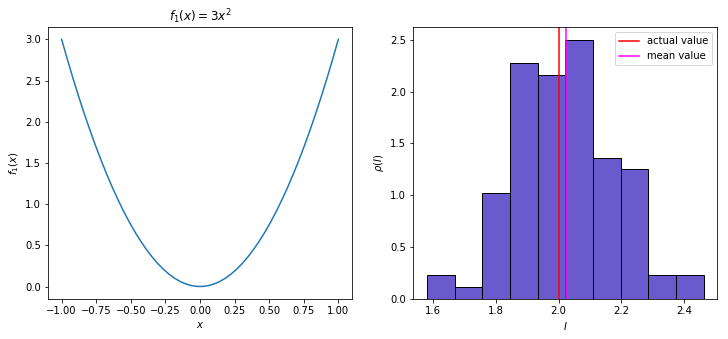

In [5]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(x1, f1(x1))
plt.title('$f_{1}(x) = 3x^{2}$')
plt.xlabel('$x$')
plt.ylabel('$f_{1}(x)$')

plt.subplot(1,2,2)
plt.hist(integral1, bins = 'auto', color = 'slateblue',ec = 'black', density = True)
plt.axvline(2, color = 'red', label = 'actual value')
plt.axvline(np.mean(integral1), color = 'magenta', label = 'mean value')
plt.legend(loc = 'best')
plt.xlabel('$I$')
plt.ylabel('$\\rho(I)$')
plt.show()

\begin{align}
    f_{2}(x) = 2x^{3}\ln(x^{2}+1) \\
    \int_{0}^{1}2x^{3}\ln(x^{2}+1)dx = \frac{1}{4}
\end{align}

In [6]:
def f2(x):
    return 2*np.log(1+x**2)*x**3

In [7]:
x2 = np.linspace(0,1)
integral2 = [ rawint(f2, a = 0, b = 1) for i in range(1000) ]

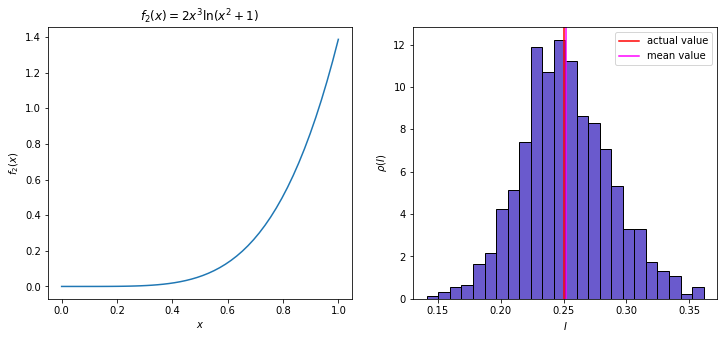

In [8]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(x2, f2(x2))
plt.title('$f_{2}(x) = 2x^{3}\ln(x^{2}+1)$')
plt.xlabel('$x$')
plt.ylabel('$f_{2}(x)$')

plt.subplot(1,2,2)
plt.hist(integral2, bins = 'auto', color = 'slateblue',ec = 'black', density = True)
plt.axvline(1/4, color = 'red', label = 'actual value')
plt.axvline(np.mean(integral2), color = 'magenta', label = 'mean value')
plt.legend(loc = 'best')
plt.xlabel('$I$')
plt.ylabel('$\\rho(I)$')
plt.show()

\begin{align}
    f_{3}(x) = \frac{4}{1+x^{2}}\\
    \int_{0}^{1}\frac{4}{1+x^{2}}dx = \pi
\end{align}

In [9]:
def f3(x):
    return 4/(1 + x**2)

In [10]:
x3 = np.linspace(0,1)
integral3 = [ rawint(f3, a = 0, b = 1) for n in range(100) ]

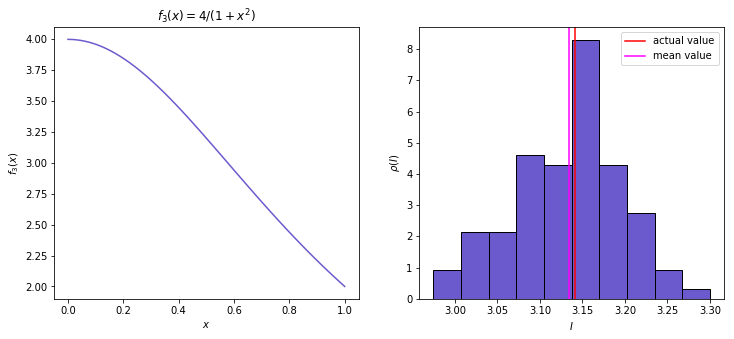

In [11]:

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(x3, f3(x3), color = 'slateblue')
plt.title('$f_{3}(x) = 4/(1+x^{2})$')
plt.xlabel('$x$')
plt.ylabel('$f_{3}(x)$')

plt.subplot(1,2,2)
plt.hist( integral3, bins = 'auto', ec = 'black', color = 'slateblue', density = True)
plt.axvline(np.pi, color = 'red', label = 'actual value')
plt.axvline(np.mean(integral3), color = 'magenta', label = 'mean value')
plt.legend( loc = 'best')
plt.xlabel('$I$')
plt.ylabel('$\\rho(I)$')
plt.show()


Gamma function

\begin{align}
   \Gamma(z) = \int_{0}^{\infty}t^{z-1}\exp(-t)dt\\
   \Gamma(n)=(n-1)!
\end{align}

In [12]:
def g(x,z):
    return np.exp(-x)*np.power(x,z-1)

In [13]:
z1 = np.linspace(0,5)
Gamma = []
for Z in z1:
    Gamma.append(rawint(lambda x: g(x, z = Z), a = 0, b = 125, n = 8000) )

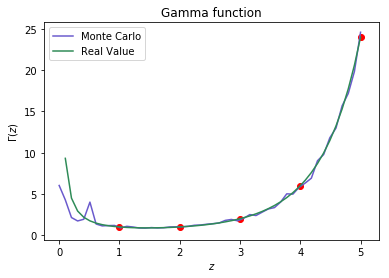

In [14]:
plt.plot(z1, Gamma, color = 'slateblue', label = 'Monte Carlo')
plt.plot(z1, gamma(z1), color = 'seagreen', label = 'Real Value')
plt.scatter([1,2,3,4,5],[1,1,2,6,24], color = 'red')
plt.title('Gamma function')
plt.xlabel('$z$')
plt.ylabel('$\Gamma(z)$')
plt.legend(loc = 'best')
plt.show()

3.- Volume 

\begin{align}
  V_{n}(R) = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)}R^{n}
\end{align}

\begin{align}
  V_{n}(1) = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)}
\end{align}

In [15]:
def vol(n, R = 1):
    return (np.power(np.pi,n/2)*np.power(R,n))/rawint(lambda x: g(x, z = 1+ 0.5*n), a = 0, b = 125, n = 8000)
def realvol(n, R = 1):
    return (np.power(np.pi,n/2)*np.power(R,n))/gamma(1+0.5*n)

In [16]:
nval = np.arange(1,20)
v = [ vol(n = m) for m in nval]
realv = realvol(nval)

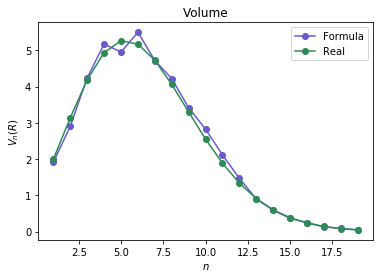

In [17]:
plt.plot(nval,v, color = 'slateblue', marker = 'o',label = 'Formula')
plt.plot(nval,realv, color = 'seagreen', marker = 'o',label = 'Real')
plt.title('Volume')
plt.xlabel('$n$')
plt.ylabel('$V_{n}(R)$')
plt.legend(loc = 'best')
plt.show()

\begin{align}
\frac{\pi r^{2}}{R^{2}} =\frac{ \text{# points inside circle}}{\text{#points inside square}}
\end{align}

In [18]:
N = 1000
dim = 2
cube_vol = 2**dim 
x = np.random.uniform(-1,1,size = (N,dim))

In [19]:
r = np.linalg.norm(x, axis = 1) <= 1

In [20]:
ball_vol = cube_vol*(r == True).sum()/N

In [21]:
ball_vol

3.172

In [22]:
t = np.linspace( 0 , 2*np.pi)
cost = np.cos( t)
sint = np.sin( t)

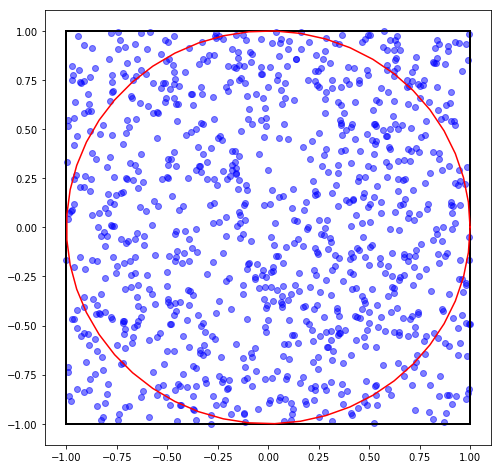

In [23]:
fig, ax = plt.subplots(figsize = (8,8))
rect = Rectangle((-1,-1),width = 2, height = 2, linewidth = 2, edgecolor = 'k', fill = False)
ax.scatter(x[:,0], x[:,1], alpha =  0.5, color = 'blue')
ax.plot(cost, sint, color = 'red')
ax.add_patch(rect)
plt.show()

In [24]:
N = 1000

x = np.random.uniform(-1,1,size = (N,3))
r = np.linalg.norm(x, axis = 1) <= 1


In [25]:
8*(r == True).sum()/N

4.064

In [26]:
vol = []
N = 100
for p in range(1,20):
    cube_vol = 2**p
    x = np.random.uniform(-1,1,size = (N,p))
    r = np.linalg.norm(x, axis = 1) <= 1
    ball_vol = cube_vol*(r == True).sum()/N
    vol.append(ball_vol)

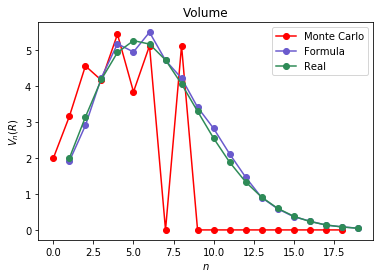

In [27]:
plt.plot(vol, color = 'red', marker = 'o', label = 'Monte Carlo')
plt.plot(nval,v, color = 'slateblue', marker = 'o',label = 'Formula')
plt.plot(nval,realv, color = 'seagreen', marker = 'o',label = 'Real')
plt.title('Volume')
plt.xlabel('$n$')
plt.ylabel('$V_{n}(R)$')
plt.legend(loc = 'best')
plt.show()

In [28]:
def factorial(n):
    N = [1,1]
    for m in range(2,n+1):
        N += [m*N[m-1]]
    return N[n]    
    

3.- Orthogonality

Any two vectors in the ball are almost orthogonal

In [17]:
def prod( n, p):
    X = np.random.normal( 0, 1, size = ( n, p))
    Y = np.random.normal( 0, 1, size = ( n, p))
    return np.diagonal(X@Y.T).mean()

In [34]:
N = [5,10,50,100,500,1000,5000,10000]

In [36]:
O = [prod(n,100) for n in N ]

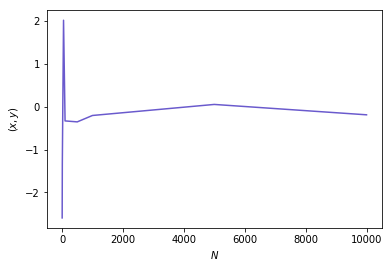

In [39]:
plt.plot(N,O, color = 'slateblue')
plt.xlabel('$N$')
plt.ylabel('$(x,y)$')
plt.show()